## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [3]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

{'whiskers': [<matplotlib.lines.Line2D at 0xafd8438>,
 'caps': [<matplotlib.lines.Line2D at 0xafd8ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0xafb7fd0>],
 'medians': [<matplotlib.lines.Line2D at 0xafd8ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb4fd4e0>],
 'means': []}

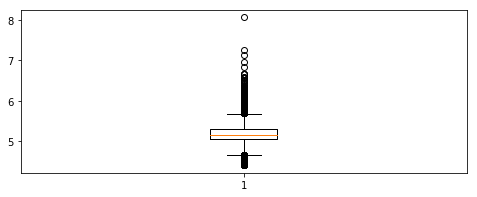

In [14]:
plt.figure(figsize=(8, 3))
plt.boxplot(np.log10(app_train['AMT_INCOME_TOTAL']))

In [23]:
income_df = app_train[['TARGET', 'AMT_INCOME_TOTAL']].copy()
income_df['discre_income'] = pd.qcut(income_df['AMT_INCOME_TOTAL'], 10)
income_df = income_df.sort_values(by='discre_income')
income_df.groupby('discre_income').mean()

,TARGET,AMT_INCOME_TOTAL
discre_income,,
"(25649.999, 81000.0]",0.081908,66254.124685
"(81000.0, 99000.0]",0.082232,91089.278813
"(99000.0, 112500.0]",0.087192,111333.276330
"(112500.0, 135000.0]",0.084894,131852.488657
"(135000.0, 147150.0]",0.090007,142953.056026
"(147150.0, 162000.0]",0.086407,157141.512098
"(162000.0, 180000.0]",0.084224,178061.632269
"(180000.0, 225000.0]",0.078065,212733.495347
"(225000.0, 270000.0]",0.070401,259491.085277


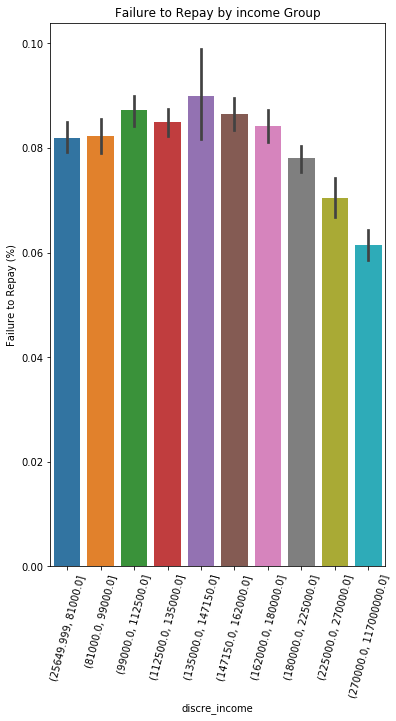

In [35]:
import seaborn as sns # 另一個繪圖-樣式套件

plt.figure(figsize = (6, 10))
# sns.catplot(x='discre_income', y='TARGET', data=income_df, kind='bar')
sns.barplot(x='discre_income', y='TARGET', data=income_df)
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('discre_income'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by income Group');